# SARIMA Models

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/wgsegment/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


<IPython.core.display.Javascript object>

## Autoregressive (AR) Models
An AR model of order $p$, denoted AR($p$), is a model where the current time point is dependent on the previous $p$ time points. Formally, the model is expressed as
$$
X_t = c + \sum_{i=1}^p \alpha_i X_{t-i} + \epsilon_t
$$
where $X_{t-i}$ are lag variables, $c$ is a constant, $\alpha_i$ are paremeters, and $\epsilon_t$ is white noise.

Equivalently, the model can be expressed with lag operators which maps current time points to previous time points. Lag operators $L^i$ are defined by
$$
L^i[X_t] = X_{t-i}
$$
which can be used to give us the expression
$$
\left(1 - \sum_{i=1}^p \alpha_i L^i \right) X_t = c + \epsilon_t
$$

In [227]:
def ar_process(num_steps, p, weights, c=0, sigma=1):
    if num_steps < p:
        raise ValueError('Model order cannot exceed number of steps.')
    t = np.arange(num_steps)
    x = np.zeros(num_steps + p)  # The first p terms will not exactly follow the AR model
    
    x[:p] = np.random.uniform(low=-1, high=1, size=p)  # Initialize first p points randomly
    x[p:] = c + np.random.normal(scale=sigma, size=num_steps)  # Add shifts and white noise beforehand
    
    for i in t:
        x[i+p] += (weights @ x[i:i+p][::-1])
    
    return x[p:]

<IPython.core.display.Javascript object>

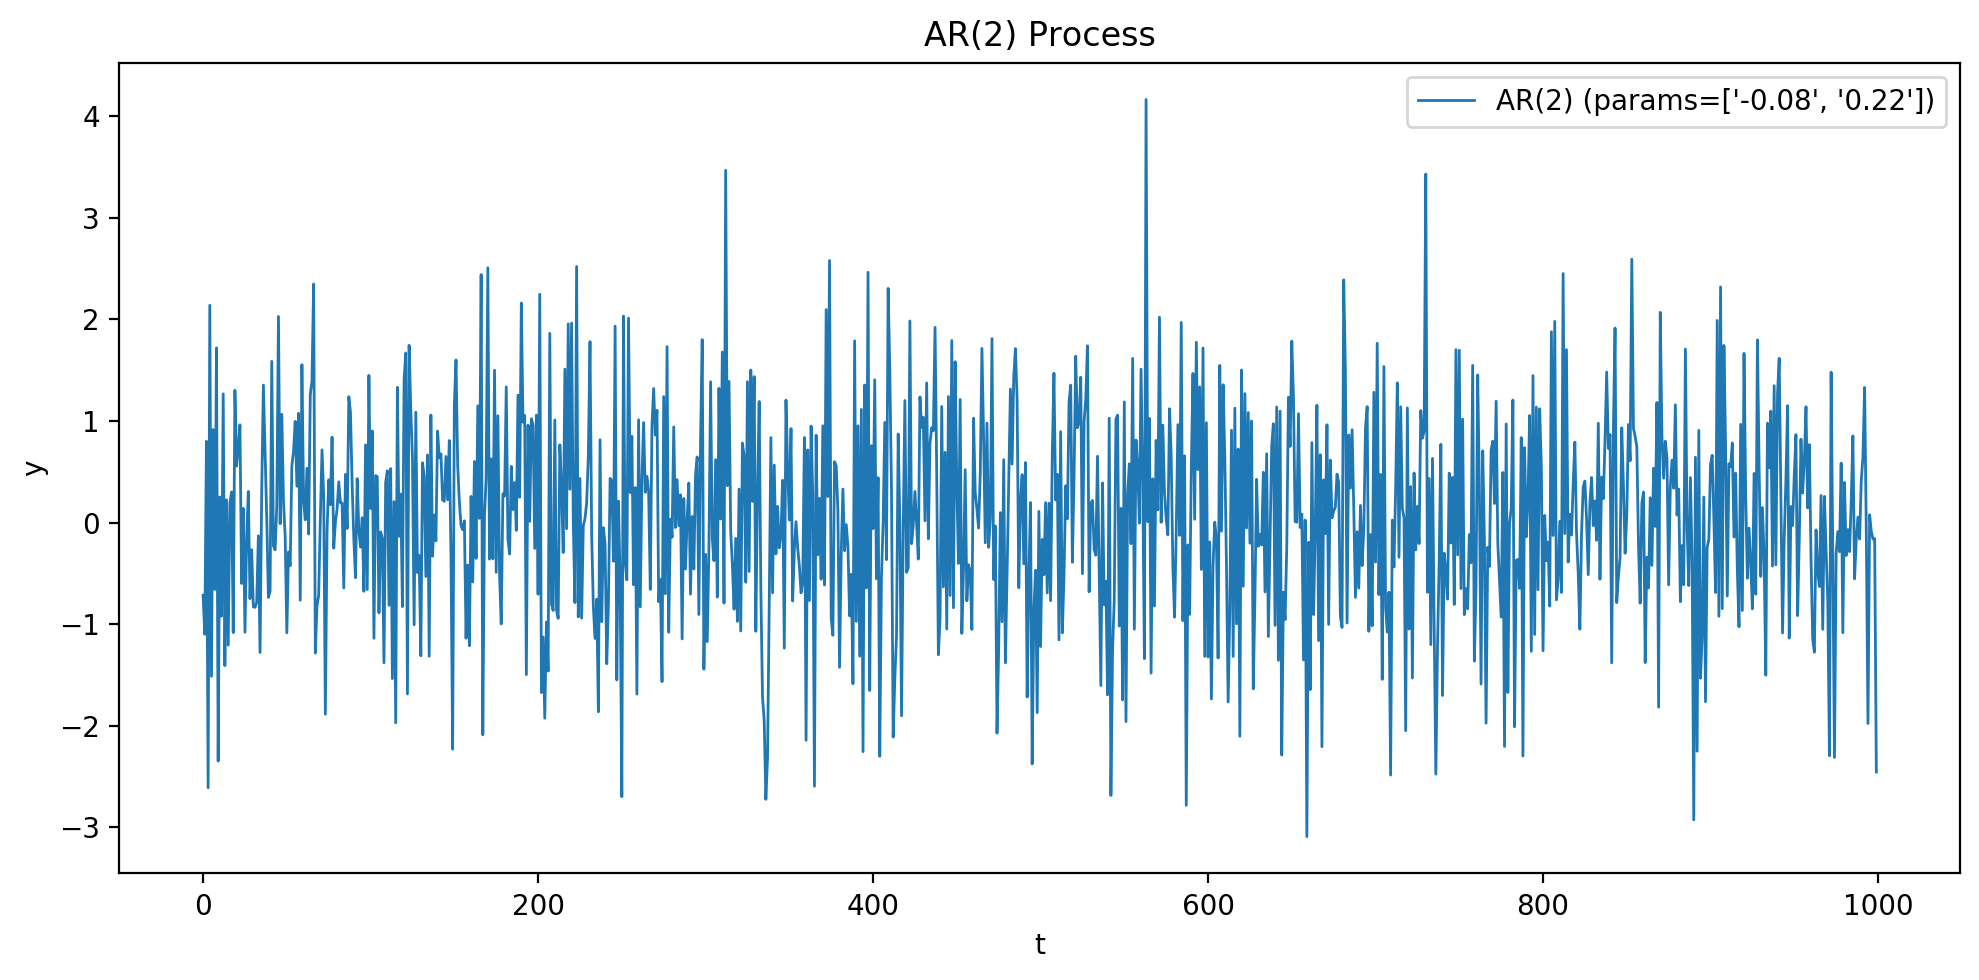

<IPython.core.display.Javascript object>

In [236]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

# Hyperparameters
num_steps = 1000
c = 0  # Constant (drift)
sigma = 1  # White noise stdev

p = 2  # Model order
alphas = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
y = ar_process(num_steps, p, alphas, c=c, sigma=sigma)

t = np.arange(num_steps)
sns.lineplot(t, y, ax=ax, label=f'AR({p}) (params={[f"{a:.2f}" for a in alphas]})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'AR({p}) Process')
ax.legend()
fig.tight_layout();

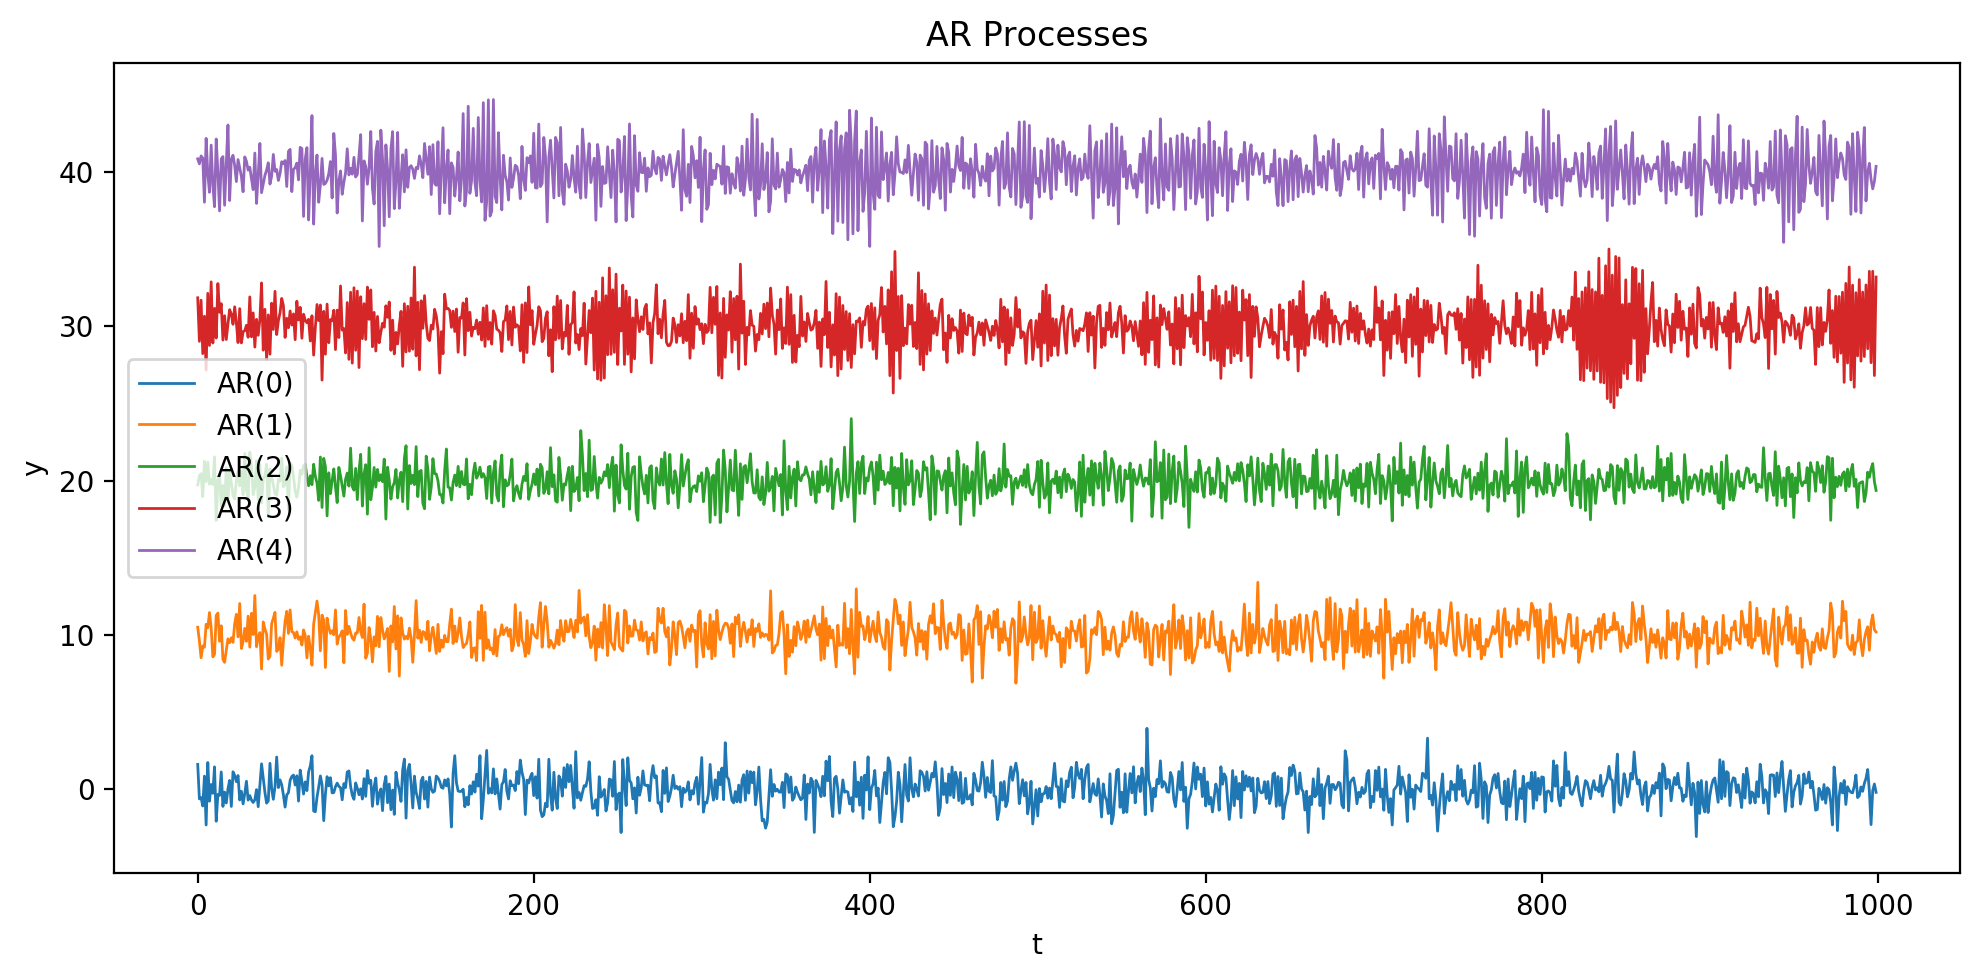

<IPython.core.display.Javascript object>

In [250]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

orders = np.arange(5)
t = np.arange(num_steps)

for p in orders:
    alphas = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
    y = ar_process(num_steps, p, alphas, c=c, sigma=sigma) + (p * 10)  # Add vertical separation
    sns.lineplot(t, y, ax=ax, label=f'AR({p})', linewidth=1)

ax.set(xlabel='t', ylabel='y', title='AR Processes')
ax.legend()
fig.tight_layout();

## Moving-Average (MA) Models
An MA model of order $q$, denoted MA($q$), is a model where the current time point is dependent on the previous $q$ noise terms. Formally, the model is expressed as
$$
X_t = \mu + \epsilon_t + \sum_{i=1}^q \beta_i \epsilon_{t-i}
$$
where $\mu = \mathrm{E}[X_t]$ (often assumed 0), $\beta_i$ are additional model parameters, and $\epsilon_{t-i}$ are again white noise. Note, it is assumed $\epsilon_t \overset{iid}{\sim} \mathcal{N}(0, \sigma^2)$ for all $t$.

In [237]:
def ma_process(num_steps, q, weights, c=0, sigma=1, mu=0):
    if num_steps < q:
        raise ValueError('Model order cannot exceed number of steps.')
    t = np.arange(num_steps)
    x = np.zeros(num_steps)
    
    noise = np.random.normal(scale=sigma, size=(num_steps + q))  # Extra q terms used to compute the first q X_t values
    ma = np.convolve(weights, noise[:-1], 'valid') if q > 0 else 0
    x = mu + noise[q:] + ma
    
    return x

<IPython.core.display.Javascript object>

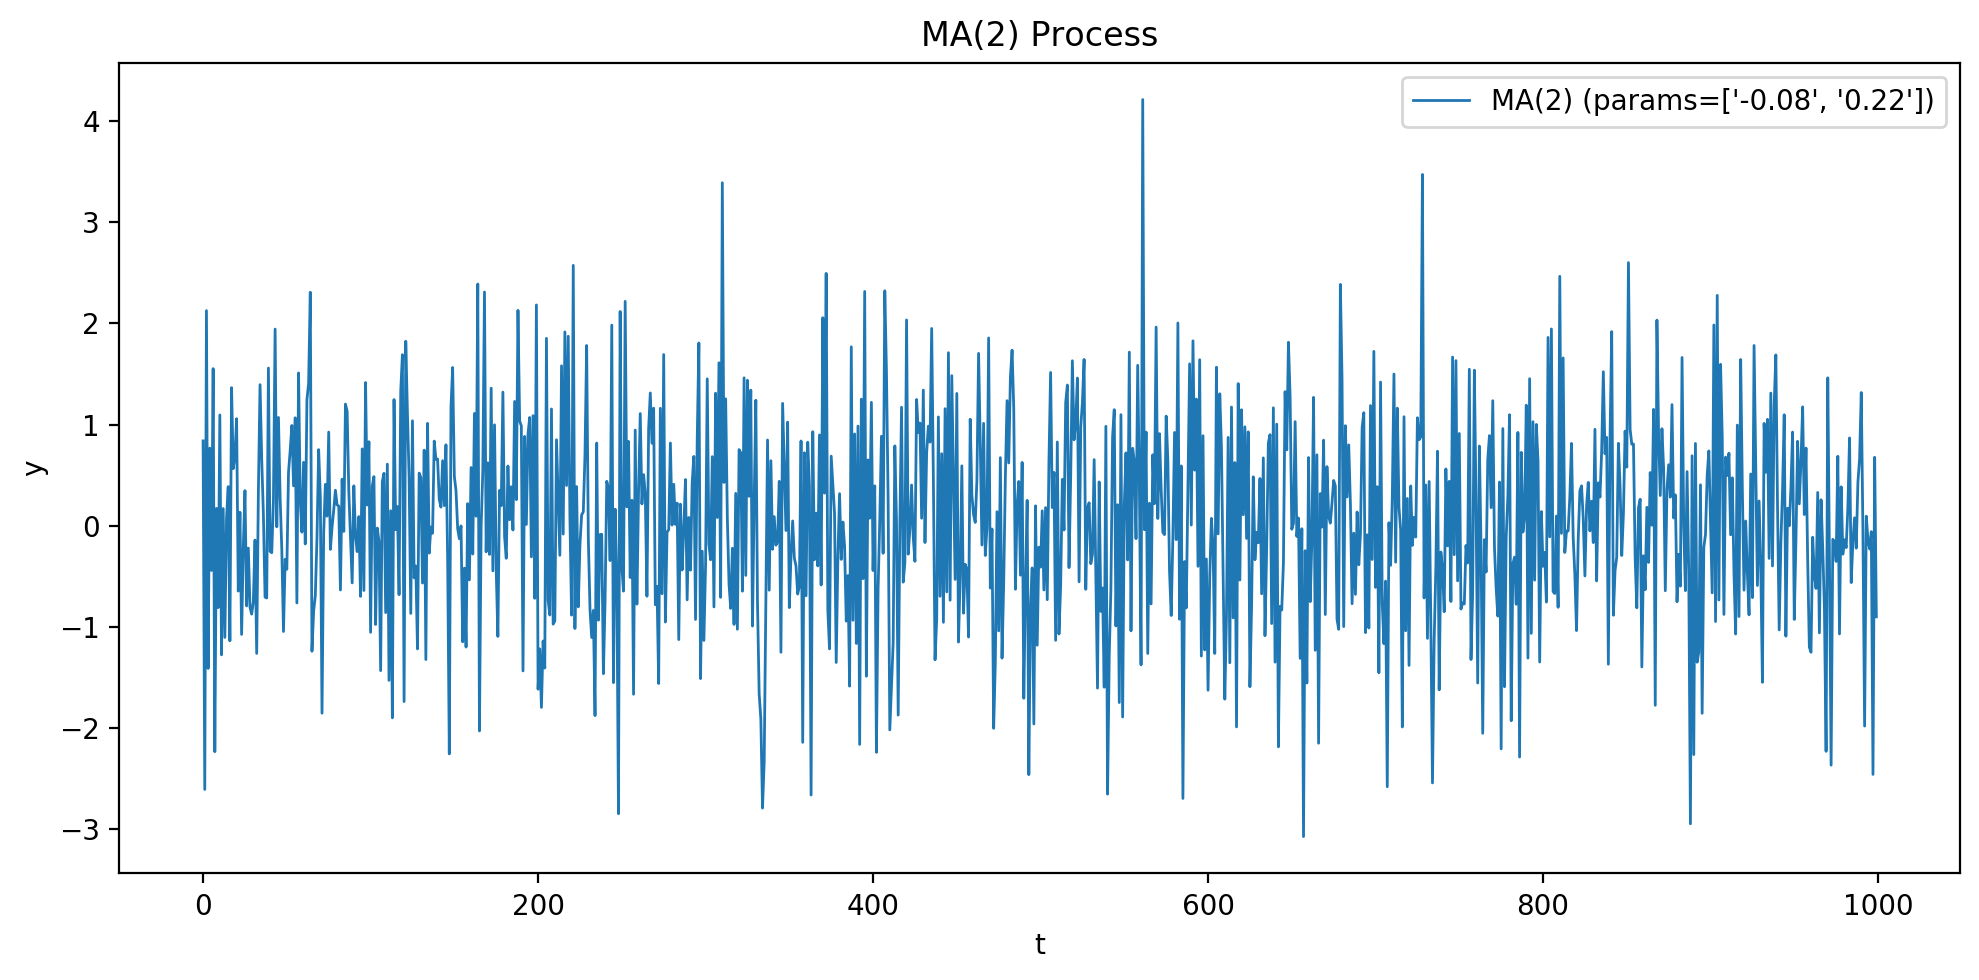

<IPython.core.display.Javascript object>

In [238]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

# Hyperparameters
num_steps = 1000
c = 0  # Constant (drift)
sigma = 1  # White noise stdev
mu = 0  # Expectation of each time point

q = 2  # Model order
betas = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random model parameters
y = ma_process(num_steps, q, betas, c=c, sigma=sigma, mu=mu)

t = np.arange(num_steps)
sns.lineplot(t, y, ax=ax, label=f'MA({q}) (params={[f"{b:.2f}" for b in betas]})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'MA({q}) Process')

fig.tight_layout();

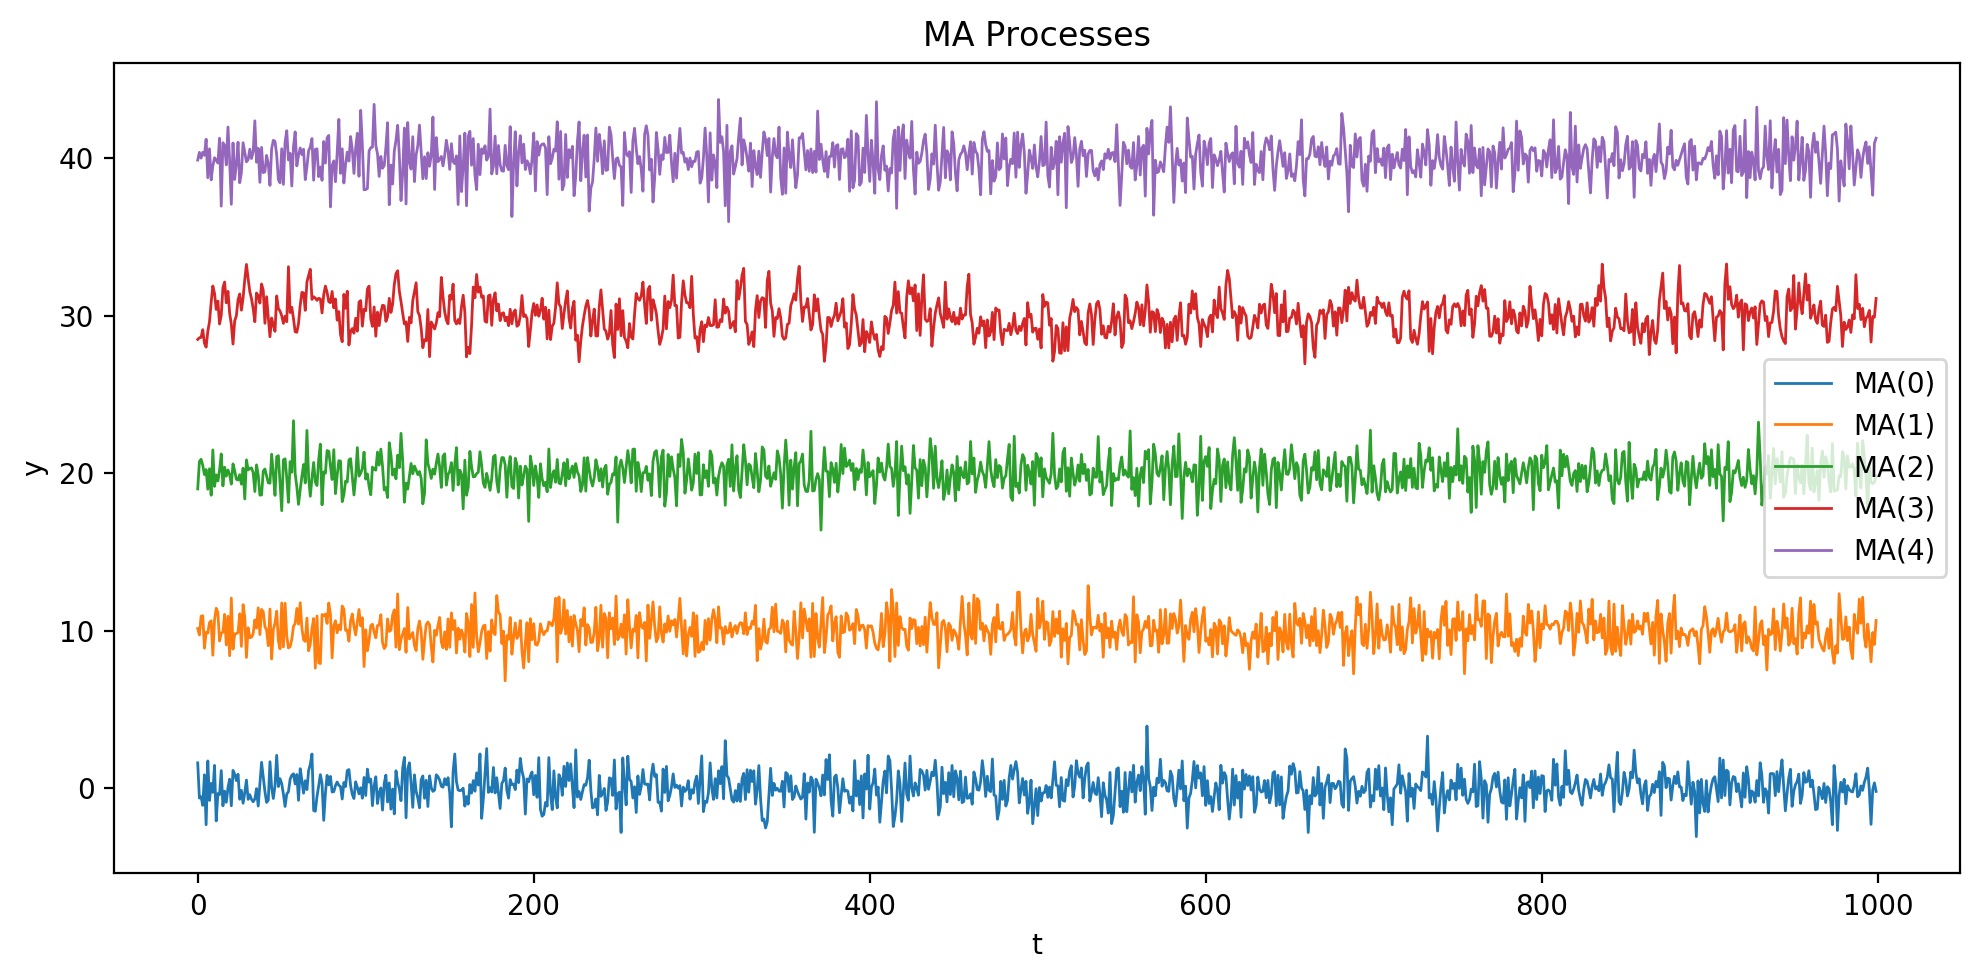

<IPython.core.display.Javascript object>

In [249]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

orders = np.arange(5)
t = np.arange(num_steps)

for q in orders:
    betas = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random model parameters
    y = ma_process(num_steps, q, betas, c=c, sigma=sigma, mu=mu) + (q * 10)
    sns.lineplot(t, y, ax=ax, label=f'MA({q})', linewidth=1)

ax.set(xlabel='t', ylabel='y', title='MA Processes')
ax.legend()
fig.tight_layout();

## Autoregressive Moving-Average (ARMA) Models
An ARMA model of order ($p$, $q$), denoted ARMA($p$, $q$), is a model where the current time point is dependent on the previous $p$ time points and previous $q$ noise terms. Formally, the model is expressed as
$$
X_t = c + \epsilon_t + \sum_{i=1}^p \alpha_i X_{t-i} + \sum_{i=1}^q \beta_i \epsilon_{t-i}
$$
or equivalently
$$
\left(1 - \sum_{i=1}^p \alpha_i L^i \right)X_t = \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$

In [246]:
def arma_process(num_steps, p, q, alphas, betas, c=0, sigma=1, mu=0):
    if num_steps < max(p, q):
        raise ValueError('Model order cannot exceed number of steps.')
    t = np.arange(num_steps)
    x = np.zeros(num_steps + p)  # The first p terms will not exactly follow the AR model
    
    x[:p] = np.random.uniform(low=-1, high=1, size=p)  # Initialize first p points uniformly at random
    
    noise = np.random.normal(scale=sigma, size=(num_steps + p + q))
    x[p:] = c + noise[p+q:]  # Add shifts and white noise beforehand
    
    ma = np.convolve(betas, noise[:-1], 'valid') if q > 0 else 0
    x += ma  # Add moving-average terms beforehand
    
    for i in t:
        x[i+p] += (alphas @ x[i:i+p][::-1])
    
    return x[p:]

<IPython.core.display.Javascript object>

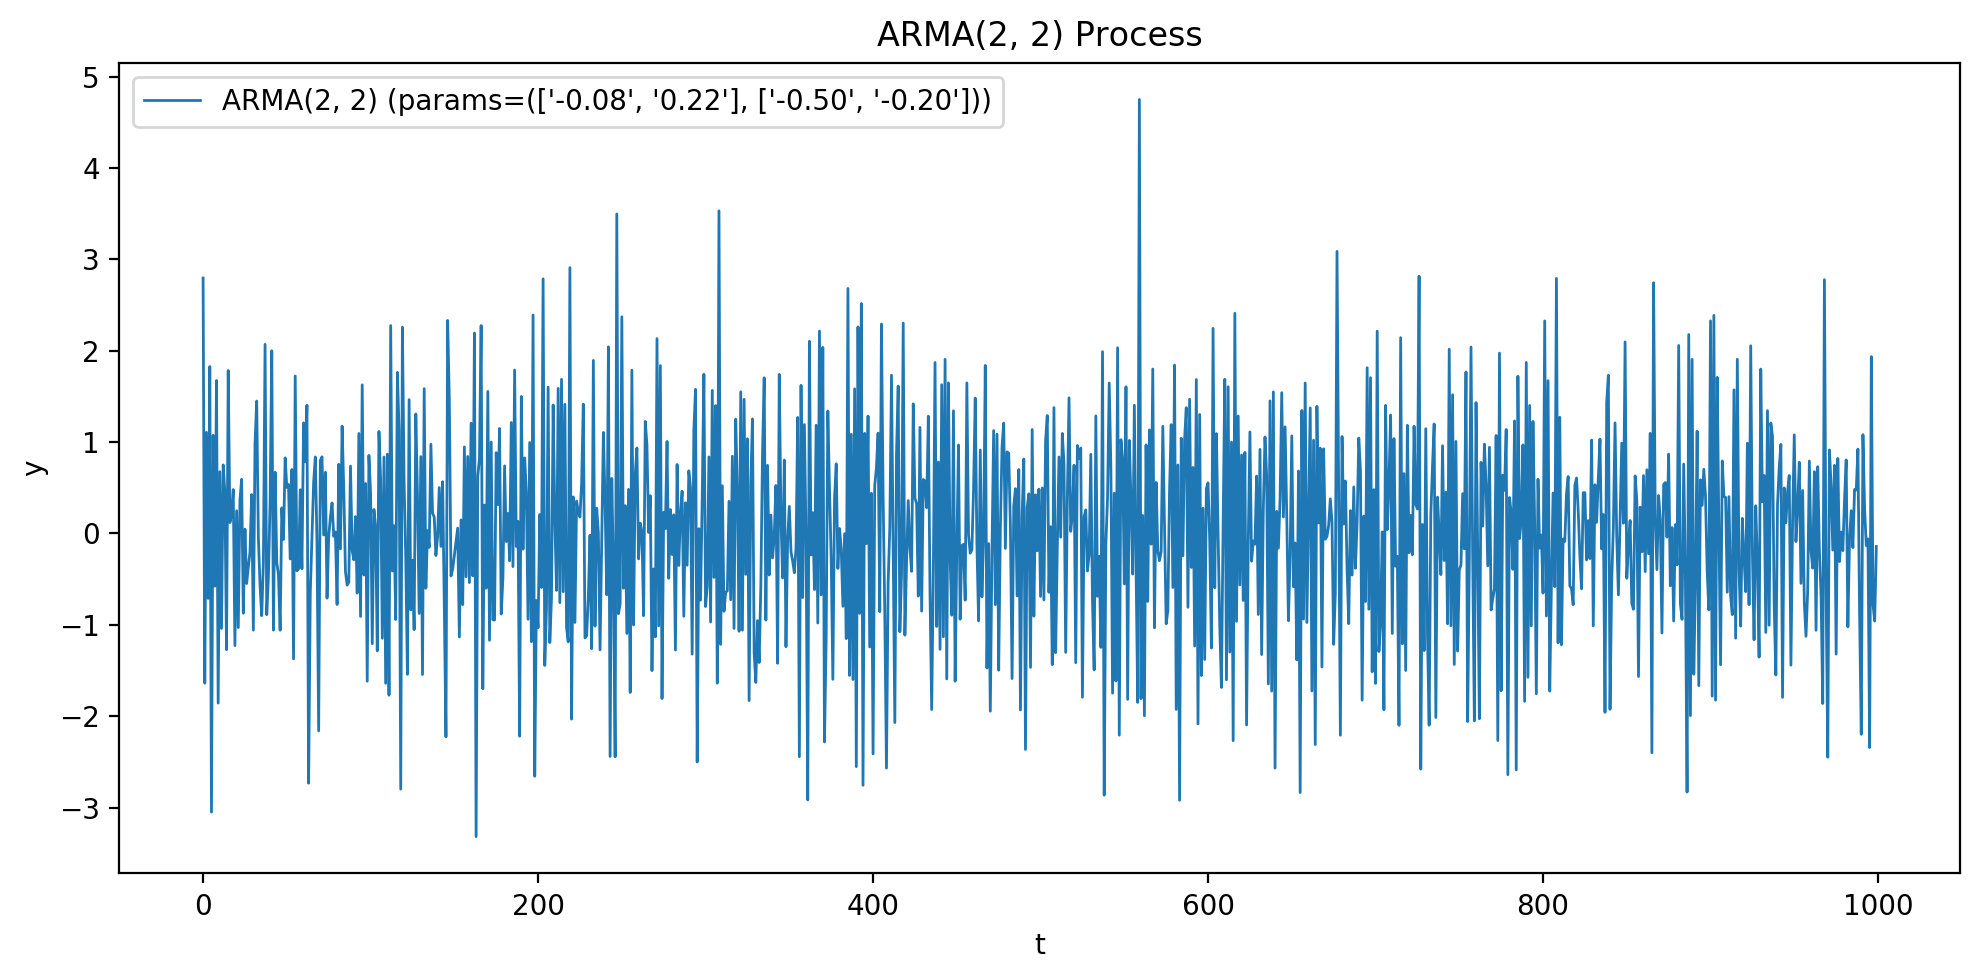

<IPython.core.display.Javascript object>

In [247]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

# Hyperparameters
num_steps = 1000
c = 0  # Constant (drift)
sigma = 1  # White noise stdev
mu = 0  # Expectation of each time point

p = 2  # AR order
q = 2  # MA order
alphas = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
betas = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random model parameters
y = arma_process(num_steps, p, q, alphas, betas, c=c, sigma=sigma, mu=mu)

t = np.arange(num_steps)
sns.lineplot(t, y, ax=ax, label=f'ARMA{p, q} (params={[f"{a:.2f}" for a in alphas], [f"{b:.2f}" for b in betas]})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'ARMA{p, q} Process')

fig.tight_layout();

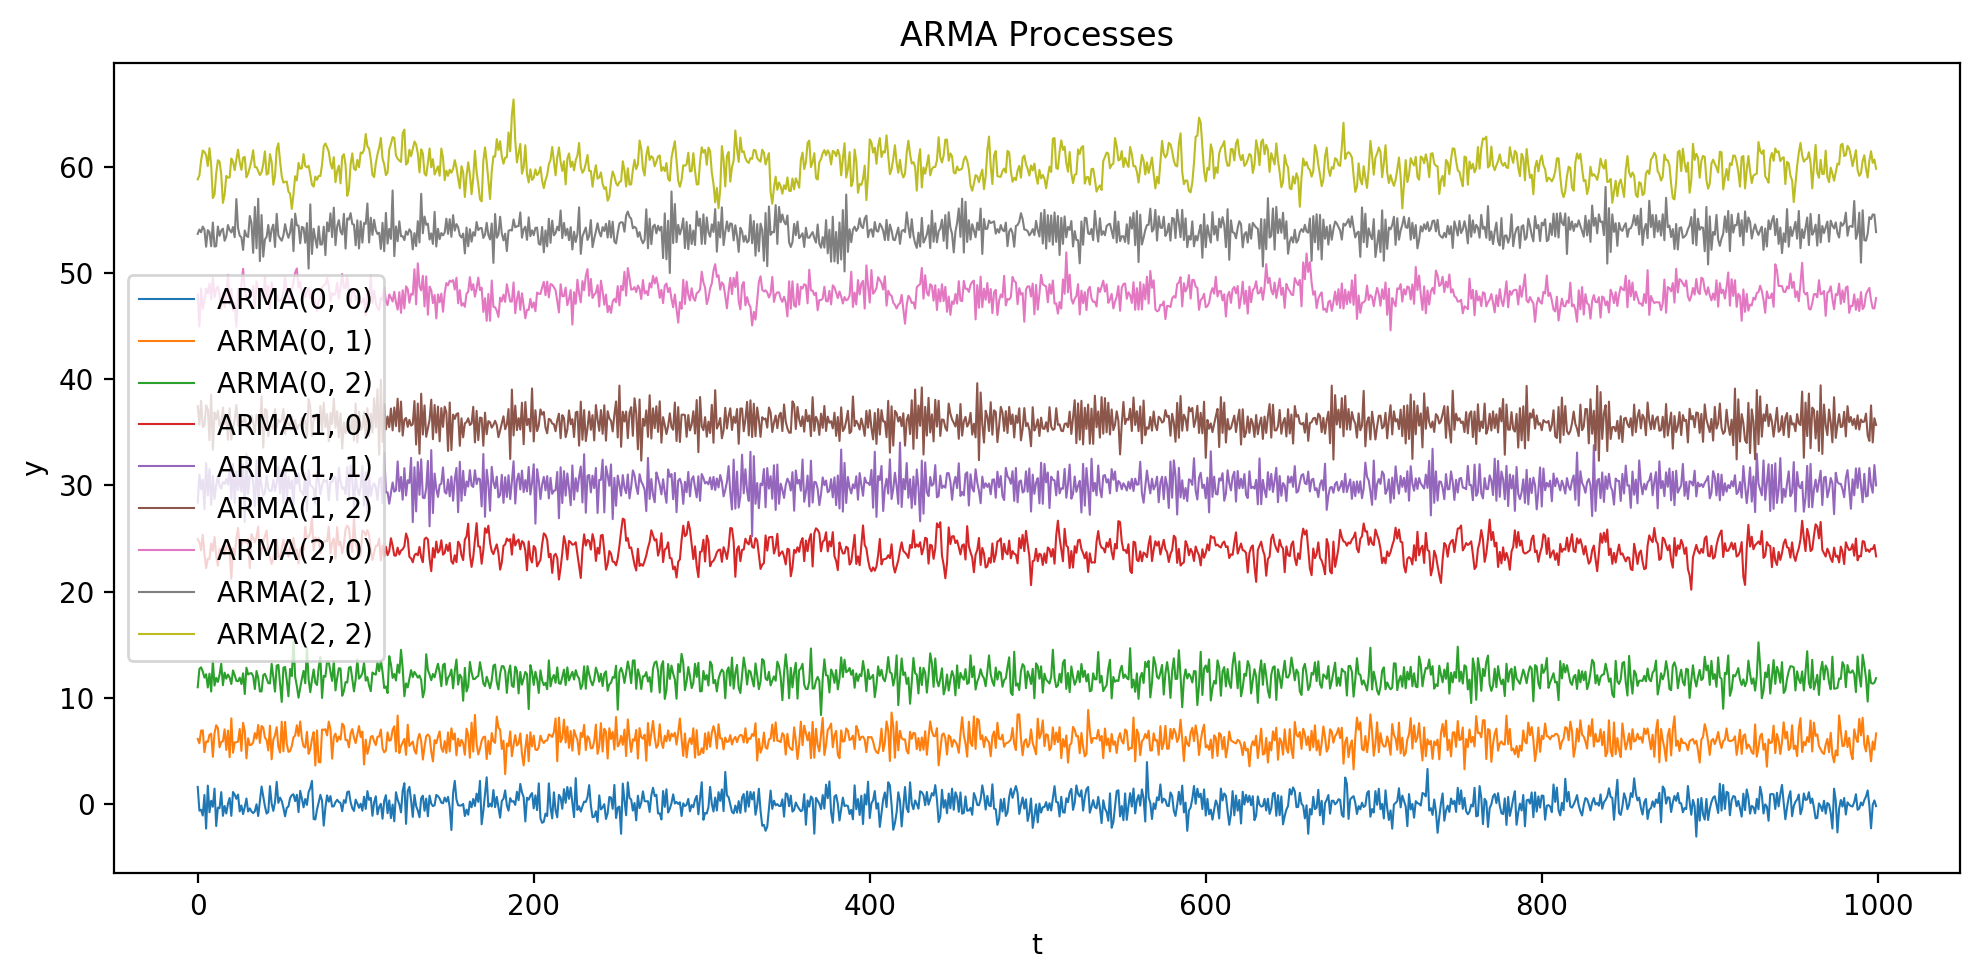

<IPython.core.display.Javascript object>

In [259]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

porders = np.arange(3)
qorders = np.arange(3)
t = np.arange(num_steps)

for p in porders:
    for q in qorders:
        alphas = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
        betas = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random model parameters
        y = arma_process(num_steps, p, q, alphas, betas, c=c, sigma=sigma, mu=mu) + (p*(len(qorders)+1) + q) * 6
        sns.lineplot(t, y, ax=ax, label=f'ARMA{p, q}', linewidth=0.75)

ax.set(xlabel='t', ylabel='y', title='ARMA Processes')
ax.legend()
fig.tight_layout();

## Autoregressive Integrated Moving-Average (ARIMA) Models
An ARIMA model of order ($p$, $d$, $q$), denoted ARIMA($p$, $d$, $q$), is like an ARMA($p+d$, $q$) model where it is assumed that the polynomial $\left(1 - \sum_{i=1}^p \alpha_i L^i\right)$ has a unit root, i.e. a factor of $(1 - L)$ of multiplicity $d$.

An ARMA($p'$, $q$) model is written
$$
\left(1 - \sum_{i=1}^{p'} \alpha_i L^i \right)X_t = \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$
but with the polynomial factorization property, $(1-L)$ can be factored out $d$ times from the the polynomial on the LHS, giving
$$
\left(1 - \sum_{i=1}^{p'} \alpha_i L^i \right) = \left(1 - \sum_{i=1}^{p'-d} \gamma_i L^i \right)(1-L)^d
$$
The ARIMA($p$, $d$, $q$) model with $p = p' - d$ is thus written
$$
\left(1 - \sum_{i=1}^{p} \gamma_i L^i \right)(1-L)^d X_t = \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$
When there is a constant $c$ introduced into the model, then the ARIMA($p$, $d$, $q$) model is said to have drift:
$$
\left(1 - \sum_{i=1}^{p} \gamma_i L^i \right)(1-L)^d X_t = c + \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$
giving a drift of $\frac{c}{1 - \sum_{i=1}^p \gamma_i}$.